<a href="https://colab.research.google.com/github/software-babooi/Linear-Regression/blob/main/ICR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
train="/content/gdrive/My Drive/icr-identify-age-related-conditions/train.csv"
test="/content/gdrive/My Drive/icr-identify-age-related-conditions/test.csv"
train_df=pd.read_csv(train)
test_df=pd.read_csv(test)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
train_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [3]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df['EJ']=train_df["EJ"].replace({'A':0,'B':1})
test_df['EJ']=test_df["EJ"].replace({'A':0,'B':1})

In [5]:
train_df.drop(columns=['Id'],axis=1,inplace=True)
test_df.drop(columns=['Id'],axis=1,inplace=True)

In [6]:
train_df.isna().sum()

AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [7]:
null_cols_list_train=train_df.columns[train_df.isnull().any()].tolist()
null_cols_list_train

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']

In [8]:
for i in null_cols_list_train:
  train_df[i]=train_df[i].fillna(train_df[i].median())

In [9]:
train_df.isnull().sum()

AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [10]:
null_cols_list_test=test_df.columns[test_df.isnull().any()].tolist()
null_cols_list_test

[]

In [11]:
train_df.duplicated().sum()

0

In [12]:
copied=train_df
transpoed=copied.transpose()
print(transpoed.duplicated().sum())

0


In [13]:
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.429301,3.533905,0.420947,20.724856,131.714987,14679.595398,31.489716,50.584437,8.517682,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.487330,50.181948,1.303281,9.991907,144.181524,19352.959387,9.864239,36.266251,10.323895,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124414,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.237329,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [15]:
train_df['EJ']=train_df['EJ'].astype(float)
test_df['EJ']=test_df['EJ'].astype(float)

In [16]:
print(train_df.info())
print('-'*30)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

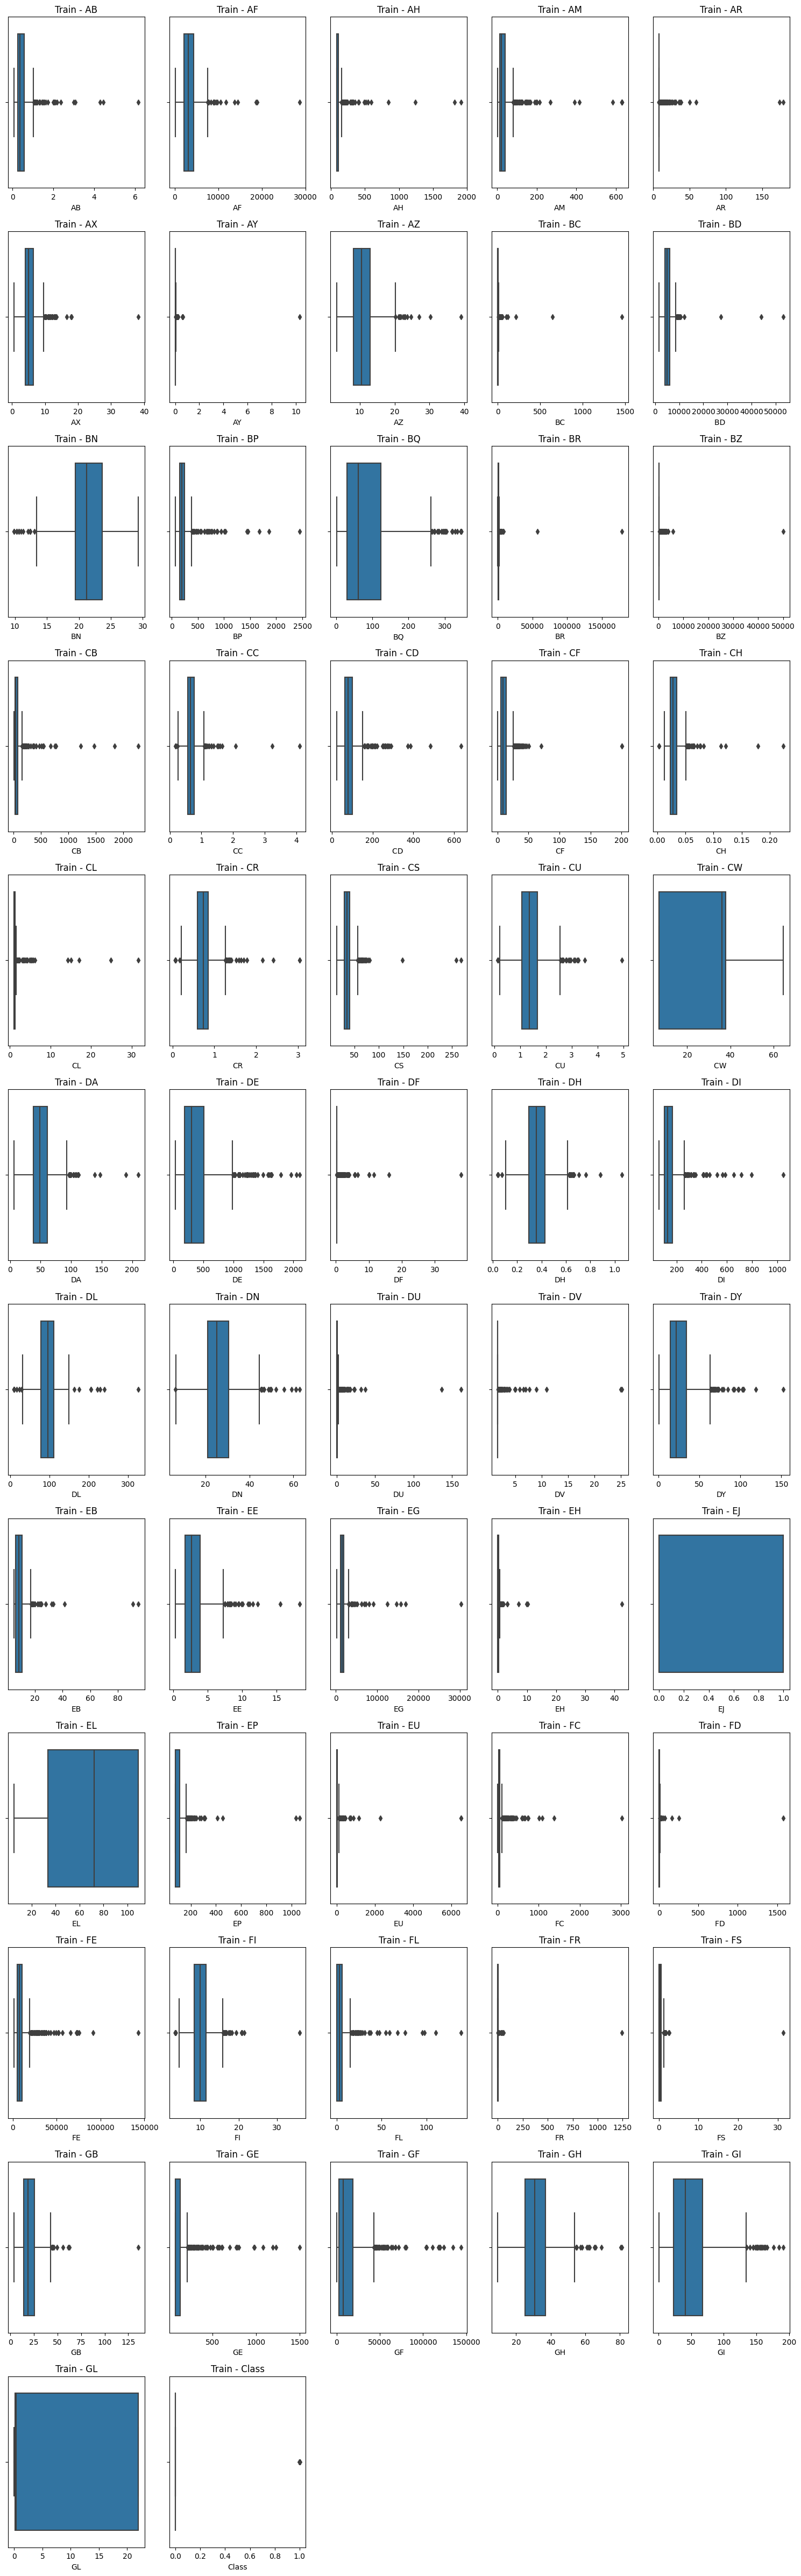

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

train_cols = list(train_df.columns)
num_cols = len(train_cols)
num_plots_per_row = 5
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(train_cols):
    sns.boxplot(x=train_df[col], ax=axes[i])
    axes[i].set_title("Train - {}".format(col))

# Remove empty subplots if necessary
if num_cols % num_plots_per_row != 0:
    for j in range(num_cols, num_rows*num_plots_per_row):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
'''
# Assuming you have your dataset loaded into a pandas DataFrame called 'train_df'

# Step 1: Calculate the first quartile (Q1) and third quartile (Q3) using the quantile() method
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the lower bound and upper bound for identifying outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 4: Identify and remove the outliers from the dataset
train_df_without_outliers = train_df[~((train_df < lower_bound) | (train_df > upper_bound)).any(axis=1)]
'''

"\n# Assuming you have your dataset loaded into a pandas DataFrame called 'train_df'\n\n# Step 1: Calculate the first quartile (Q1) and third quartile (Q3) using the quantile() method\nQ1 = train_df.quantile(0.25)\nQ3 = train_df.quantile(0.75)\n\n# Step 2: Calculate the IQR (Interquartile Range)\nIQR = Q3 - Q1\n\n# Step 3: Define the lower bound and upper bound for identifying outliers\nlower_bound = Q1 - (1.5 * IQR)\nupper_bound = Q3 + (1.5 * IQR)\n\n# Step 4: Identify and remove the outliers from the dataset\ntrain_df_without_outliers = train_df[~((train_df < lower_bound) | (train_df > upper_bound)).any(axis=1)]\n"

In [19]:
'''
import matplotlib.pyplot as plt
import seaborn as sns

train_cols = list(train_df_without_outliers.columns)
num_cols = len(train_cols)
num_plots_per_row = 5
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(train_cols):
    sns.boxplot(x=train_df_without_outliers[col], ax=axes[i])
    axes[i].set_title("Train - {}".format(col))

# Remove empty subplots if necessary
if num_cols % num_plots_per_row != 0:
    for j in range(num_cols, num_rows*num_plots_per_row):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ntrain_cols = list(train_df_without_outliers.columns)\nnum_cols = len(train_cols)\nnum_plots_per_row = 5\nnum_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row\n\nfig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))\naxes = axes.flatten()\n\nfor i, col in enumerate(train_cols):\n    sns.boxplot(x=train_df_without_outliers[col], ax=axes[i])\n    axes[i].set_title("Train - {}".format(col))\n\n# Remove empty subplots if necessary\nif num_cols % num_plots_per_row != 0:\n    for j in range(num_cols, num_rows*num_plots_per_row):\n        fig.delaxes(axes[j])\n\nplt.tight_layout()\nplt.show()\n'

In [21]:
print(train_df.shape)
#print(train_df_without_outliers.shape)

(617, 57)


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
!pip install tabpfn[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip3 install imblearn --ignore-installed scikit-learn
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.15.0 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.2.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is inc

In [25]:
train_df['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [29]:
test_df

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from tabpfn import TabPFNClassifier
smote=SMOTE(random_state=42)
stratified_kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
classifier = TabPFNClassifier(device='cpu')
X=train_df.drop(columns=['Class'],axis=1)
y=train_df['Class']
split=1
for train_index, test_index in stratified_kfold.split(X, y):
  
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
  classifier.fit(X_train_resampled, y_train_resampled)
  logloss = log_loss(y_test, classifier.predict_proba(X_test))
  print('Split number: ',split)
  print("Log_Loss:", logloss)
  predicted_probability=classifier.predict_proba(test_df)
  print('Predicted Probability score:\n', predicted_probability)
  print('-'*50)
  split+=1


Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Split number:  1
Log_Loss: 0.1822453083181291
Predicted Probability score:
 [[0.88418704 0.11581293]
 [0.88418704 0.11581293]
 [0.88418704 0.11581293]
 [0.88418704 0.11581293]
 [0.88418704 0.11581293]]
--------------------------------------------------
Split number:  2
Log_Loss: 0.10052017184042733
Predicted Probability score:
 [[0.8922995  0.10770055]
 [0.8922995  0.10770055]
 [0.8922995  0.10770055]
 [0.8922995  0.10770055]
 [0.8922995  0.10770055]]
--------------------------------------------------
Split number:  3
Log_Loss: 0.3215774258408131
Predicted Probability score:
 [[0.88172054 0.11827949]
 [0.88172054 0.11827949]
 [0.88172054 0.11827949]
 [0.88172054 0.11827949]
 [0.88172054 0.11827949]]
--------------------------------------------------
Split number:  4
Log_Loss: 0.16616553160018696
Predicted Probability score:
 [[0.9191351  0.08086488]
 [0.9191351  0.08086488]
 [0.9191351  0.0808